___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Pandas Data Visualization Exercise

This is just a quick exercise for you to review the various plots we showed earlier. Use **df3** to replicate the following plots. 

In [ ]:
# Install required libraries
!pip install pandas matplotlib seaborn

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# df3 = pd.read_csv('df3')
# %matplotlib inline

In [23]:
df3 = pd.read_csv('df3.txt')
display(df3)

,a,b,c,d
0,0.336272,0.325011,0.001020,0.401402
1,0.980265,0.831835,0.772288,0.076485
2,0.480387,0.686839,0.000575,0.746758
3,0.502106,0.305142,0.768608,0.654685
4,0.856602,0.171448,0.157971,0.321231
...,...,...,...,...
495,0.528705,0.226122,0.055835,0.131962
496,0.324730,0.215201,0.935302,0.794115
497,0.118036,0.264574,0.629206,0.824062
498,0.227021,0.660209,0.851353,0.478676


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       500 non-null    float64
 1   b       500 non-null    float64
 2   c       500 non-null    float64
 3   d       500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [12]:
df3.head()

,a,b,c,d
0,0.336272,0.325011,0.001020,0.401402
1,0.980265,0.831835,0.772288,0.076485
2,0.480387,0.686839,0.000575,0.746758
3,0.502106,0.305142,0.768608,0.654685
4,0.856602,0.171448,0.157971,0.321231


** Recreate this scatter plot of b vs a. Note the color and size of the points. Also note the figure size. See if you can figure out how to stretch it in a similar fashion. Remeber back to your matplotlib lecture...**

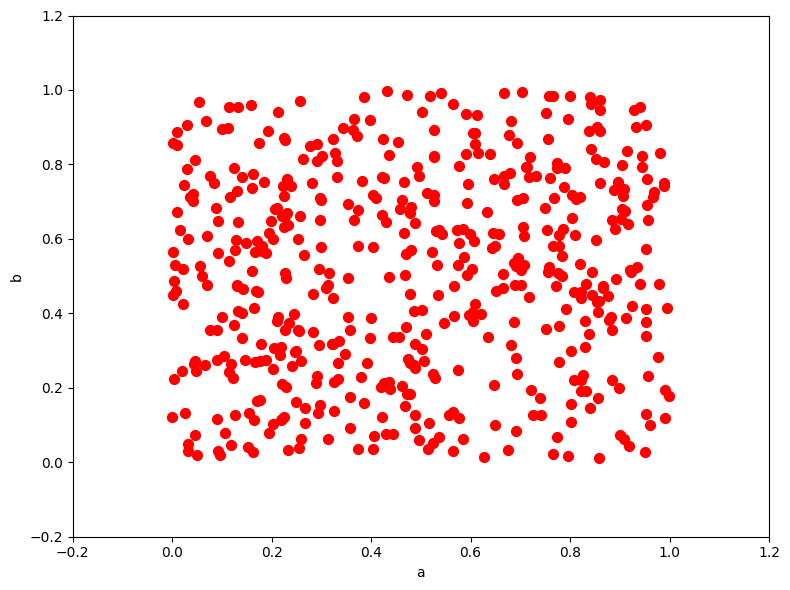

In [13]:

plt.figure(figsize=(8, 6))

plt.scatter(df3['a'], df3['b'], color='red', s=50)

plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel('a')
plt.ylabel('b')

plt.tight_layout()

plt.show()

** Create a histogram of the 'a' column.**

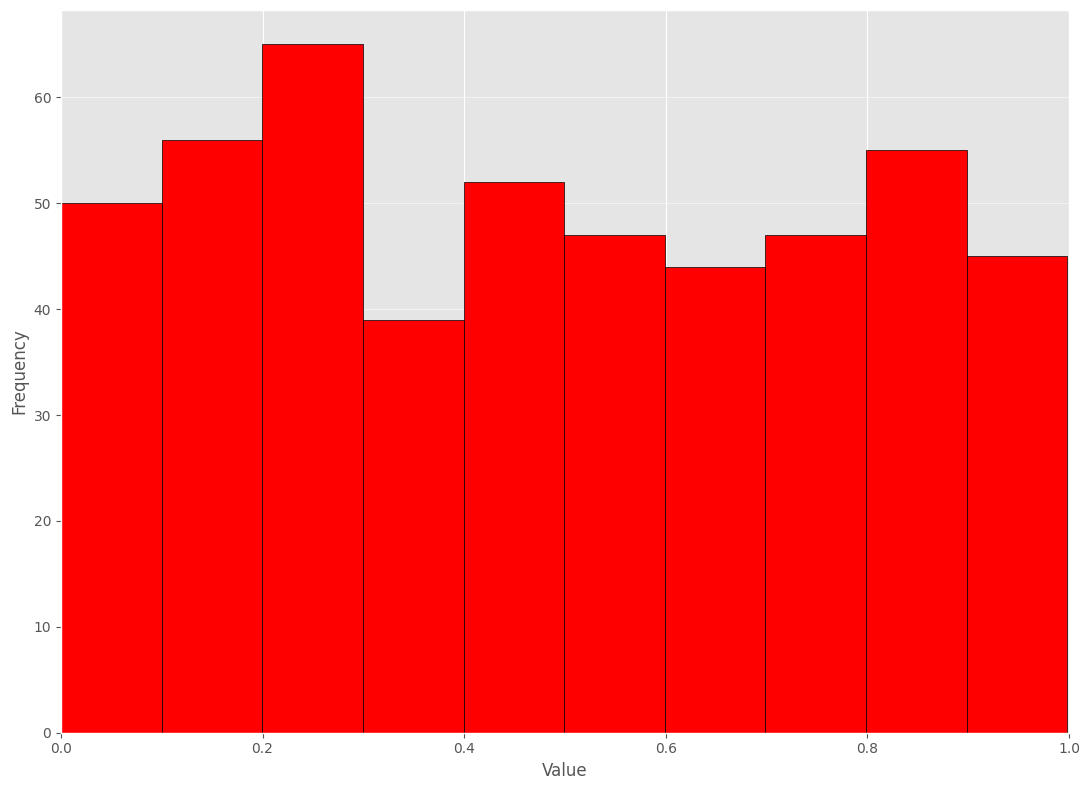

In [31]:
# Create a new figure with a specified size (width=11, height=8 inches)
plt.figure(figsize=(11, 8))

# Plot a histogram of the 'a' column from df3
# - Use 10 bins
# - Set the color of the bars to red
# - Set the edge color of the bars to black for better visibility
plt.hist(df3['a'], bins=10, color='red', edgecolor='black')

# Set the x-axis label
plt.xlabel('Value')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the limits of the x-axis from 0.0 to 1.0
plt.xlim(0.0, 1.0)

# Add a horizontal grid to the y-axis with some transparency
plt.grid(True, axis='y', alpha=0.5)

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

** These plots are okay, but they don't look very polished. Use style sheets to set the style to 'ggplot' and redo the histogram from above. Also figure out how to add more bins to it.***

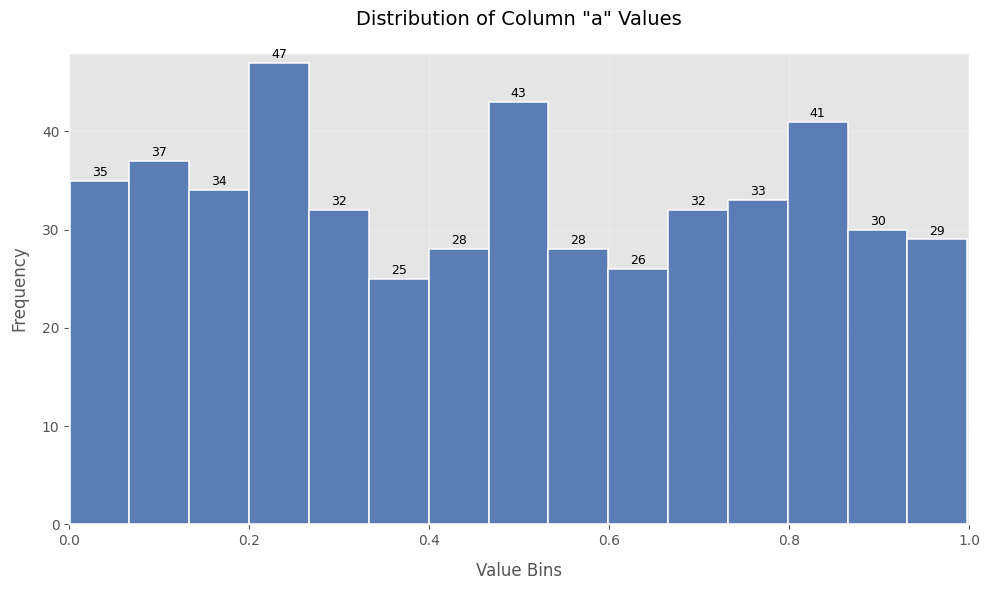

In [15]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 6), dpi=100)

n, bins, patches = plt.hist(df3['a'], 
                           bins=15,
                           color='#4C72B0',
                           edgecolor='white',
                           linewidth=1.2,
                           alpha=0.9)

plt.title('Distribution of Column "a" Values', 
          fontsize=14, pad=20)
plt.xlabel('Value Bins', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12, labelpad=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3)

for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width()/2, 
             patches[i].get_height()+0.5, 
             str(int(n[i])),
             ha='center',
             fontsize=9)

plt.xlim(0, 1.0)
plt.ylim(0, max(n)+1)
plt.tight_layout()

plt.show()

** Create a boxplot comparing the a and b columns.**

C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_25532\2650677948.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([df3['a'], df3['b']],


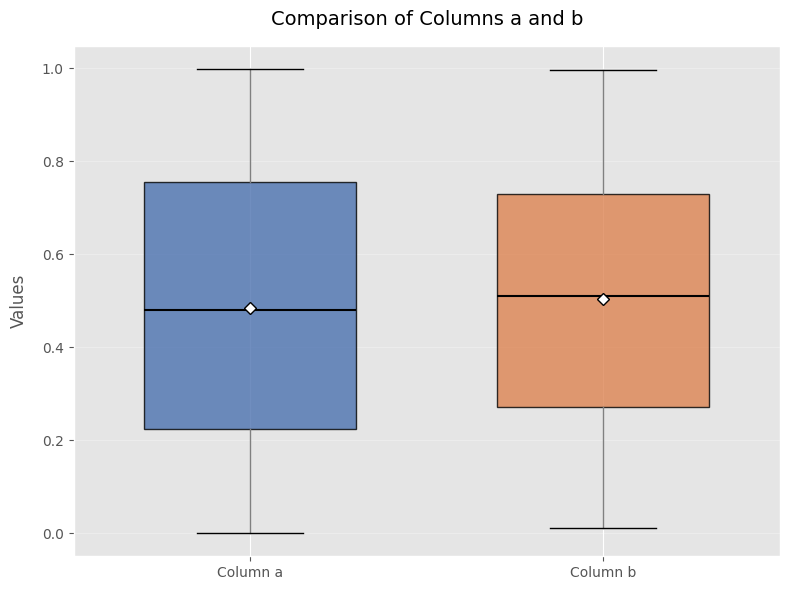

In [16]:
plt.style.use('ggplot')

plt.figure(figsize=(8, 6), dpi=100)

bp = plt.boxplot([df3['a'], df3['b']], 
                 patch_artist=True,
                 labels=['Column a', 'Column b'],
                 widths=0.6,
                 showmeans=True,
                 meanprops={'marker':'D', 
                           'markerfacecolor':'white', 
                           'markeredgecolor':'black'})

colors = ['#4C72B0', '#DD8452']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

plt.setp(bp['whiskers'], color='gray', linestyle='-')
plt.setp(bp['medians'], color='black', linewidth=1.5)

plt.title('Comparison of Columns a and b', fontsize=14, pad=15)
plt.ylabel('Values', fontsize=12, labelpad=10)

plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

** Create a kde plot of the 'd' column **

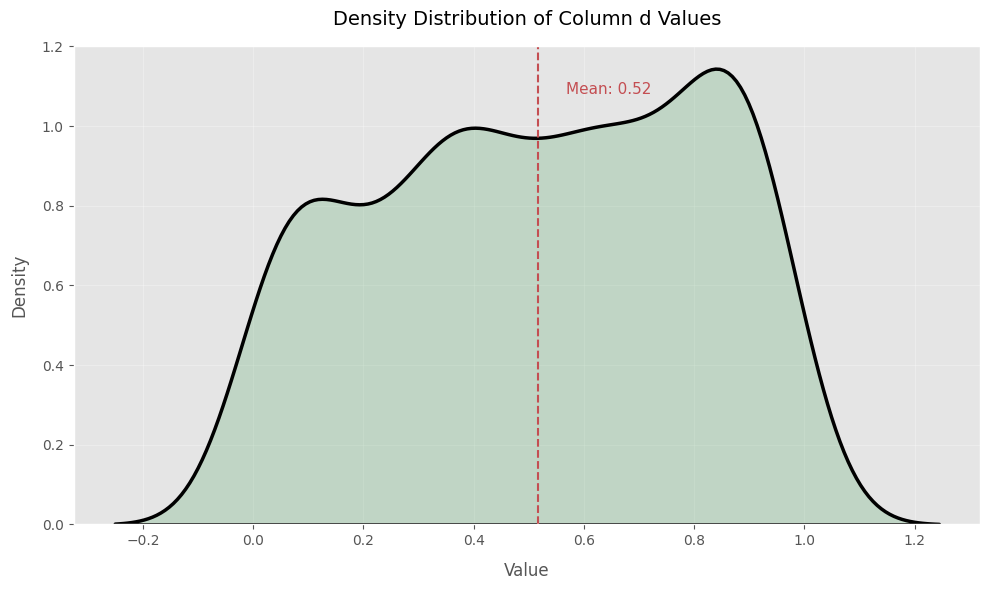

In [32]:
# Import seaborn for advanced statistical plotting
import seaborn as sns

# Set the plot style to 'ggplot' for a clean, professional look
plt.style.use('ggplot')

# Create a new figure with a specified size and resolution
plt.figure(figsize=(10, 6), dpi=100)

# Create a Kernel Density Estimate (KDE) plot for the 'd' column in df3
# - Use a green color for the line
# - Set the line width to 2.5
# - Fill the area under the curve with some transparency
# - Add a black edge color for the filled area
sns.kdeplot(
    data=df3, 
    x='d', 
    color='#55A868',      # Green color for the KDE line
    linewidth=2.5,        # Line width
    fill=True,            # Fill under the curve
    alpha=0.25,           # Transparency for the fill
    edgecolor='black'     # Edge color for the fill
)

# Add a descriptive title and axis labels with custom font sizes and padding
plt.title('Density Distribution of Column d Values', fontsize=14, pad=15)
plt.xlabel('Value', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)

# Customize the tick labels and add a grid for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3)

# Calculate the mean of column 'd' and add a vertical dashed line at the mean
mean_val = df3['d'].mean()
plt.axvline(mean_val, color='#C44E52', linestyle='--', linewidth=1.5)

# Annotate the mean value on the plot
plt.text(
    mean_val + 0.05, plt.ylim()[1] * 0.9, 
    f'Mean: {mean_val:.2f}', 
    color='#C44E52',
    fontsize=11
)

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

** Figure out how to increase the linewidth and make the linestyle dashed. (Note: You would usually not dash a kde plot line)**

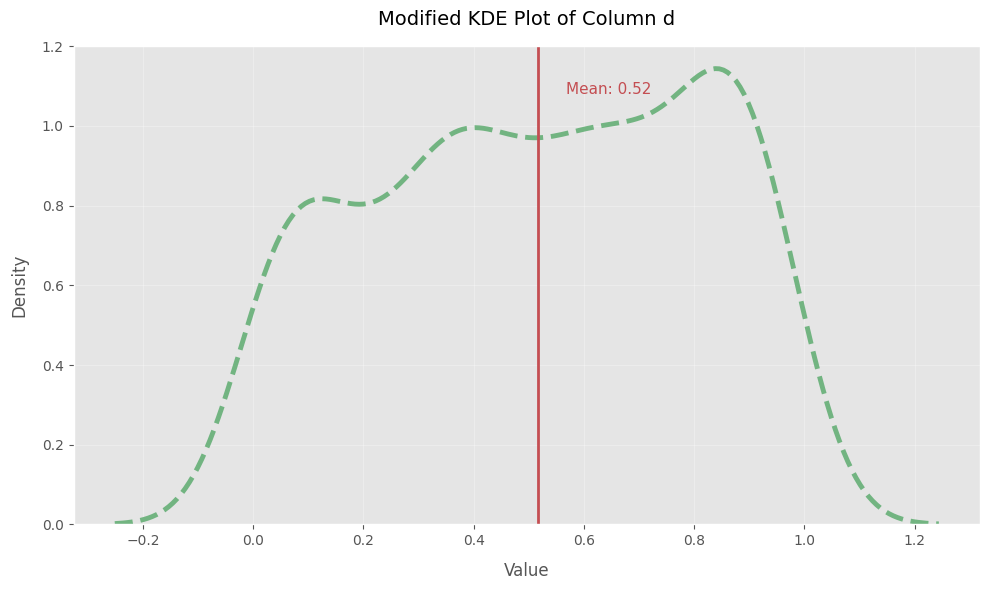

In [34]:
# Set the plot style to 'ggplot' for a clean, professional look
plt.style.use('ggplot')

# Create a new figure with a specified size and resolution
plt.figure(figsize=(10, 6), dpi=100)

# Create a Kernel Density Estimate (KDE) plot for the 'd' column in df3
# - Use a green color for the line
# - Set the line width to 3.5 for emphasis
# - Make the line dashed using linestyle='--'
# - Do not fill under the curve (fill=False)
# - Set transparency with alpha
sns.kdeplot(
    data=df3,
    x='d',
    color='#55A868',      # Green color for the KDE line
    linewidth=3.5,        # Thicker line
    linestyle='--',       # Dashed line style
    fill=False,           # No fill under the curve
    alpha=0.8             # Line transparency
)

# Add a descriptive title and axis labels with custom font sizes and padding
plt.title('Modified KDE Plot of Column d', fontsize=14, pad=15)
plt.xlabel('Value', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)

# Customize the tick labels and add a grid for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3)

# Calculate the mean of column 'd' and add a vertical solid line at the mean for contrast
mean_val = df3['d'].mean()
plt.axvline(mean_val, color='#C44E52', linestyle='-', linewidth=2)

# Annotate the mean value on the plot
plt.text(
    mean_val + 0.05, plt.ylim()[1]*0.9,
    f'Mean: {mean_val:.2f}',
    color='#C44E52',
    fontsize=11
)

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

** Create an area plot of all the columns for just the rows up to 30. (hint: use .ix).**

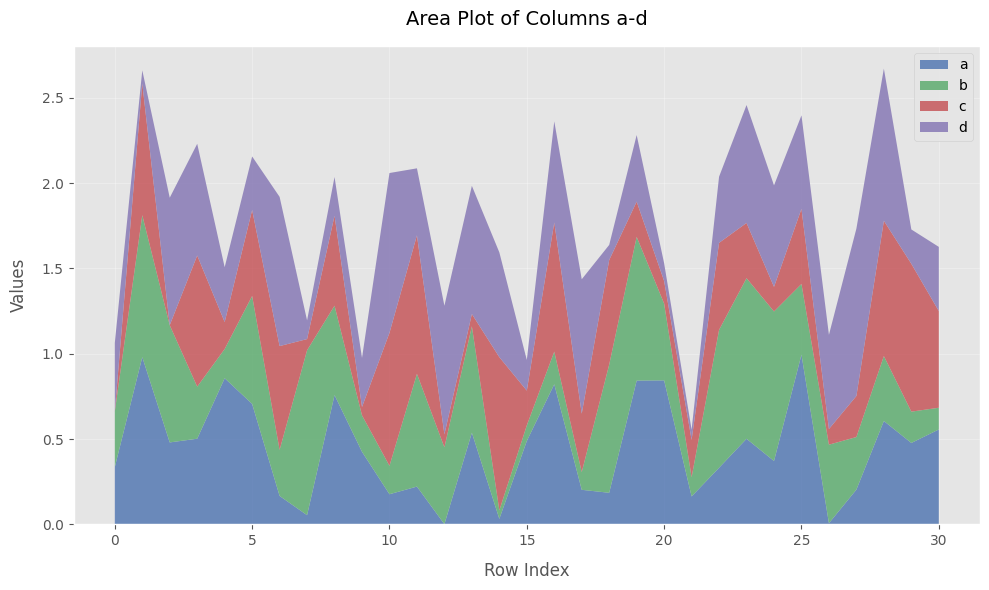

In [19]:
plt.style.use('ggplot')

plot_data = df3.loc[:30]

# Create area plot
plt.figure(figsize=(10, 6), dpi=100)
plt.stackplot(range(len(plot_data)), 
             plot_data['a'], plot_data['b'], 
             plot_data['c'], plot_data['d'],
             labels=['a', 'b', 'c', 'd'],
             colors=['#4C72B0', '#55A868', '#C44E52', '#8172B2'],
             alpha=0.8)

# Add title and labels
plt.title('Area Plot of Columns a-d', fontsize=14, pad=15)
plt.xlabel('Row Index', fontsize=12, labelpad=10)
plt.ylabel('Values', fontsize=12, labelpad=10)

# Customize ticks and legend
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

## Bonus Challenge!
Note, you may find this really hard, reference the solutions if you can't figure it out!
** Notice how the legend in our previous figure overlapped some of actual diagram. Can you figure out how to display the legend outside of the plot as shown below?**

** Try searching Google for a good stackoverflow link on this topic. If you can't find it on your own - [use this one for a hint.](http://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas)**

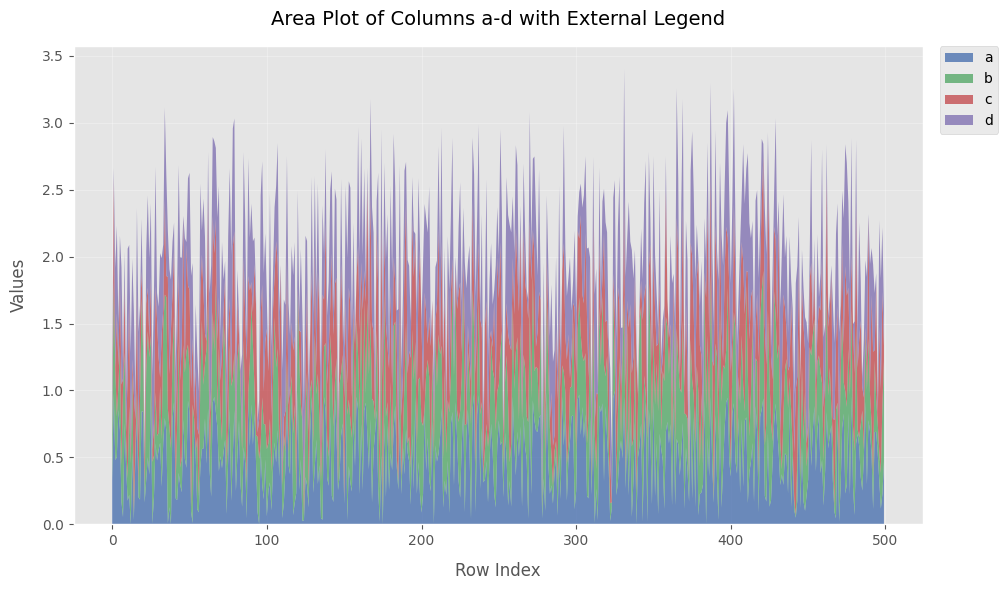

In [20]:
plt.style.use('ggplot')

plt.figure(figsize=(12, 6), dpi=100)  # Wider figure

# Create area plot
stack = plt.stackplot(range(len(df3)), 
                     df3['a'], df3['b'], 
                     df3['c'], df3['d'],
                     labels=['a', 'b', 'c', 'd'],
                     colors=['#4C72B0', '#55A868', '#C44E52', '#8172B2'],
                     alpha=0.8)

# Add title and labels
plt.title('Area Plot of Columns a-d with External Legend', fontsize=14, pad=15)
plt.xlabel('Row Index', fontsize=12, labelpad=10)
plt.ylabel('Values', fontsize=12, labelpad=10)

# Customize ticks and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3)

# Move legend outside the plot area
plt.legend(bbox_to_anchor=(1.02, 1),  # Positions legend outside top-right
           loc='upper left', 
           borderaxespad=0.,
           fontsize=10,
           frameon=True)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Right side padding

plt.show()

# Great Job!